Імпортуємо модулі

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Імпортуємо csv файл та відображаємо його наповнення

In [4]:
data = pd.read_csv("/Users/yurab/Desktop/Python for university/MMTAD/Lab0/digital_marketing_campaign_dataset.csv")
data.shape
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


Беремо колонки для аналізу

In [5]:
x = data[["Age", "TimeOnSite"]]
y = data["Conversion"]

Шукаємо оптимальне значення сусідів 

In [74]:
array=[]
for optimal_neighour in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = KNeighborsClassifier(n_neighbors=optimal_neighour)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    array.append(accuracy_score(y_test, prediction))


Відображаємо на графіку

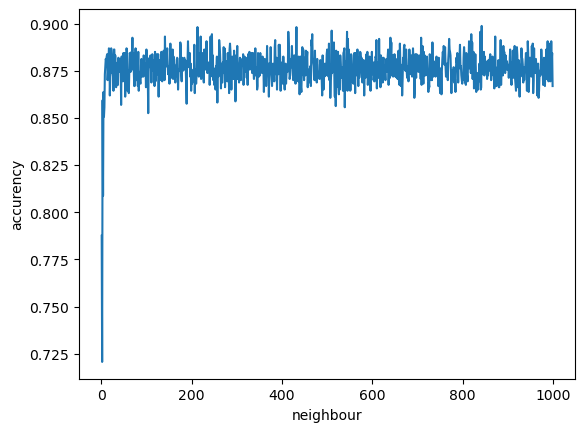

In [75]:
plt.plot([i for i in range(1,1000)], array)
plt.xlabel("neighbour")
plt.ylabel("accurency")
plt.show()

Судячи з графіку, то пік досягається саме в значеннях ~ 260 (0.889). Хоча й при значенні 7 ми вже маємо 0,87, що є дуже хорошим значенням

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = KNeighborsClassifier(n_neighbors=260) 
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.89125


Робимо крос валідацію на трьох блоках

In [29]:
cross_score = KNeighborsClassifier(n_neighbors= 5)
scrores = cross_val_score(cross_score, x_train, y_train, cv=3)
print(scrores)
print(scrores.mean())

[0.85895033 0.86216596 0.86075949]
0.8606252617083885


Створюємо графік (візуалізація границь рішень)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

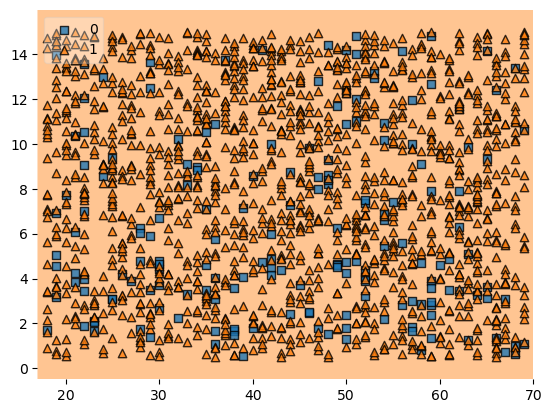

In [31]:
plot_decision_regions(np.array(x_test), np.array(y_test), clf=model, legend=2)